<a href="https://colab.research.google.com/github/chinmayj23/ML/blob/master/ML_lab2_J079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

In [8]:
filename="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [9]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

In [10]:
df = pd.read_csv(filename, names = headers)
df.iloc[2,:]
df.replace("?", np.nan, inplace = True)
df.head()
(df.isna().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)
avg_stroke=df['stroke'].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
avg_hp = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avg_hp, inplace=True)
avg_rpm = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, avg_rpm, inplace=True)

In [12]:
df['num-of-doors'].value_counts()
df["num-of-doors"].replace(np.nan, "four", inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [17]:
df["normalized-losses"] = df["normalized-losses"].astype("int")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["price"] = df["price"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")


In [18]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km']=235/df["highway-mpg"]

In [ ]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
print(df[["length","width","height"]])

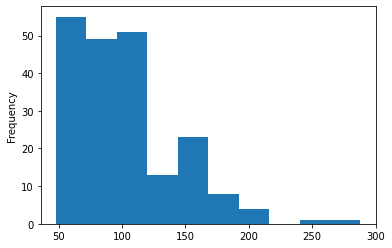

In [19]:
df.horsepower.plot(kind='hist')

In [20]:
temp = pd.cut(df['horsepower'], bins = 3, labels = ['low','medium','high'])
df['horsepower-binned'] = temp
df.head

<bound method NDFrame.head of      symboling  normalized-losses  ...    price horsepower-binned
0            3                122  ...  13495.0               low
1            3                122  ...  16500.0               low
2            1                122  ...  16500.0            medium
3            2                164  ...  13950.0               low
4            2                164  ...  17450.0               low
..         ...                ...  ...      ...               ...
200         -1                 95  ...  16845.0               low
201         -1                 95  ...  19045.0            medium
202         -1                 95  ...  21485.0            medium
203         -1                 95  ...  22470.0               low
204         -1                 95  ...  22625.0               low

[205 rows x 27 columns]>

In [21]:
df['horsepower-binned'].value_counts()
one_hot1 = pd.get_dummies(df['fuel-type'])
one_hot2 = pd.get_dummies(df['aspiration'])
df = df.join(one_hot1)
df = df.join(one_hot2)
df.drop("fuel-type", axis = 1, inplace=True)
df.drop("aspiration", axis = 1, inplace=True)
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,low,0,1,1,0
201,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,medium,0,1,0,1
202,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,medium,0,1,1,0
203,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,low,1,0,0,1


ex-2

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
filename='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(filename)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [23]:
print(df.shape)
print(df.dtypes)

(201, 29)
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [26]:
df[["engine-size", "price"]].corr()

cor=df.corr() 
print(cor)
for i in df.describe().columns:
    temp = cor['price'][i]
    if (temp > 0):
       print(i)

                   symboling  normalized-losses  ...    diesel       gas
symboling           1.000000           0.466264  ... -0.196735  0.196735
normalized-losses   0.466264           1.000000  ... -0.101546  0.101546
wheel-base         -0.535987          -0.056661  ...  0.307237 -0.307237
length             -0.365404           0.019424  ...  0.211187 -0.211187
width              -0.242423           0.086802  ...  0.244356 -0.244356
height             -0.550160          -0.373737  ...  0.281578 -0.281578
curb-weight        -0.233118           0.099404  ...  0.221046 -0.221046
engine-size        -0.110581           0.112360  ...  0.070779 -0.070779
bore               -0.140019          -0.029862  ...  0.054458 -0.054458
stroke             -0.008245           0.055563  ...  0.241303 -0.241303
compression-ratio  -0.182196          -0.114713  ...  0.985231 -0.985231
horsepower          0.075819           0.217299  ... -0.169053  0.169053
peak-rpm            0.279740           0.239543  ..

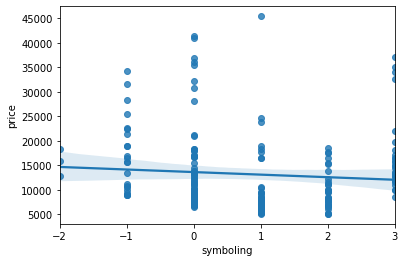

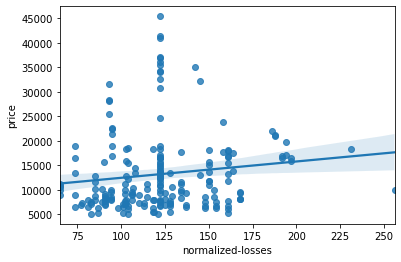

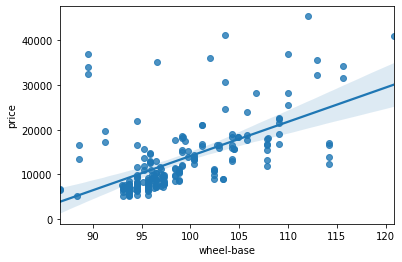

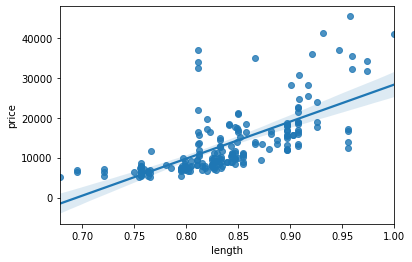

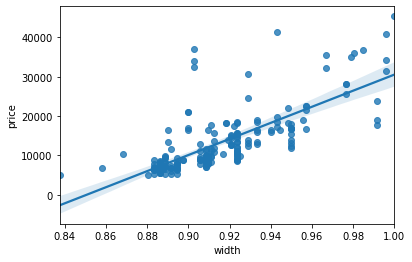

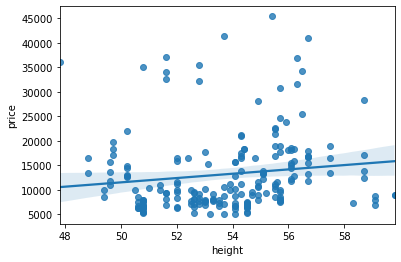

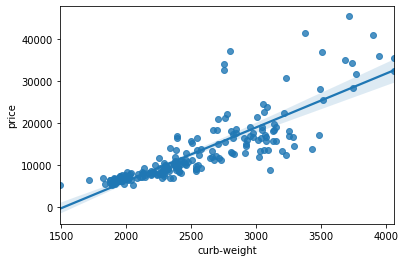

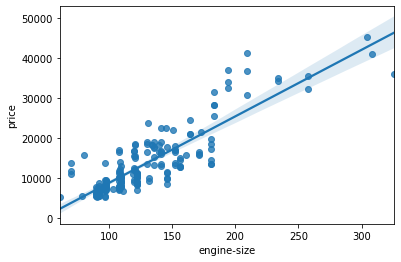

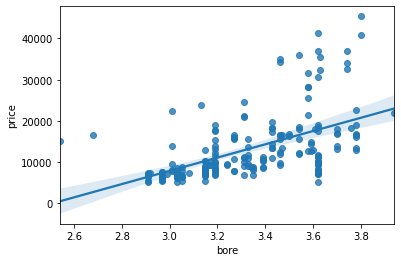

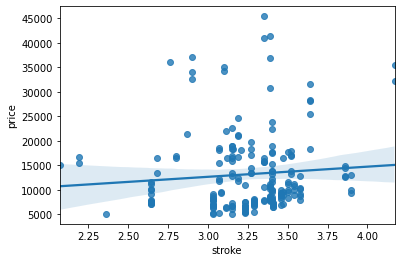

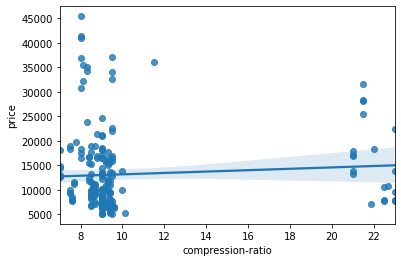

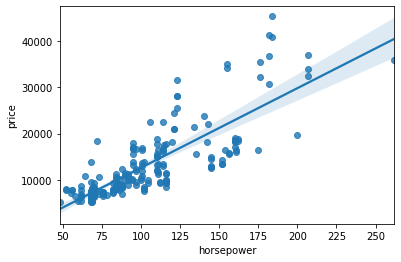

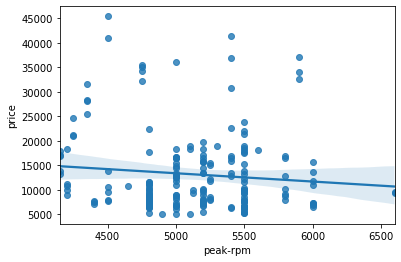

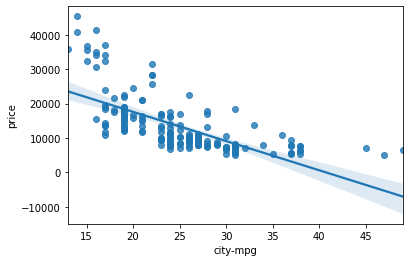

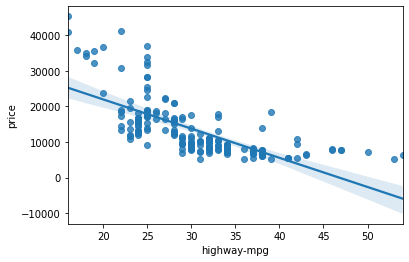

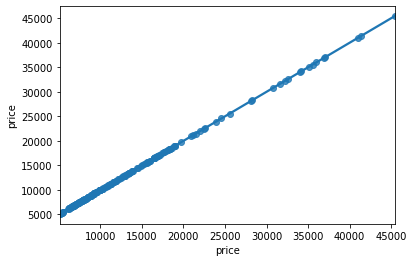

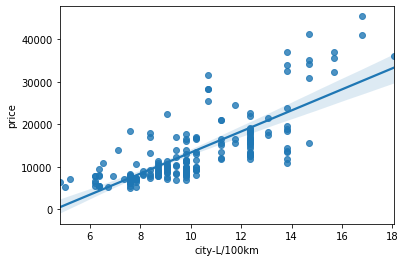

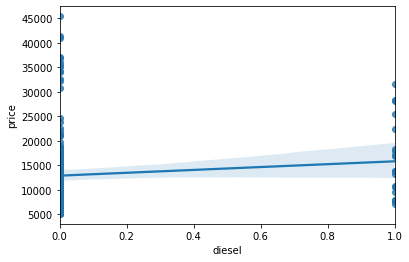

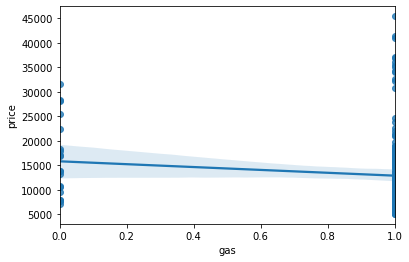

In [27]:
df["peak-rpm"].dtypes
for i in df.describe().columns:
    sns.regplot(x=df[i], y=df.price)
    plt.show()

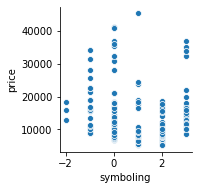

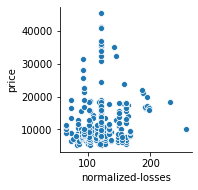

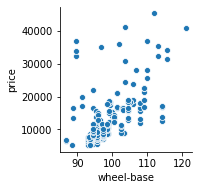

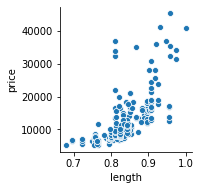

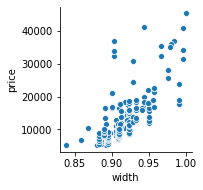

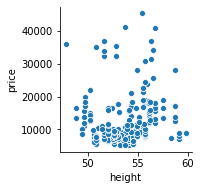

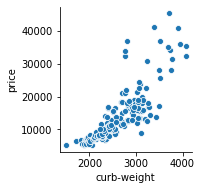

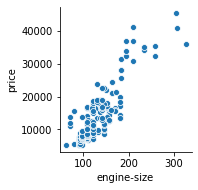

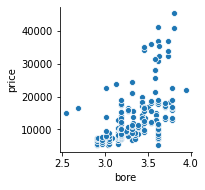

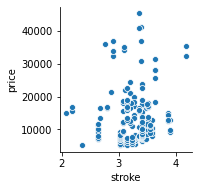

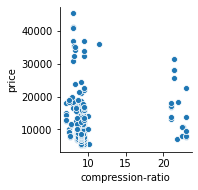

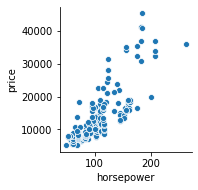

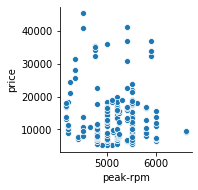

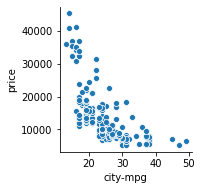

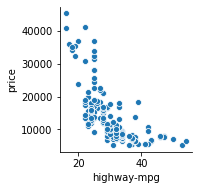

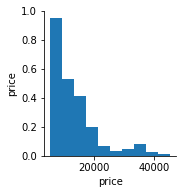

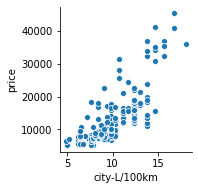

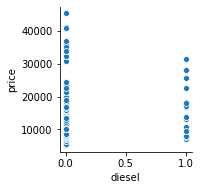

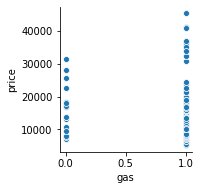

In [28]:
for i in df.select_dtypes([np.number]).columns:
  sns.pairplot(x_vars=i,y_vars='price',data=df)

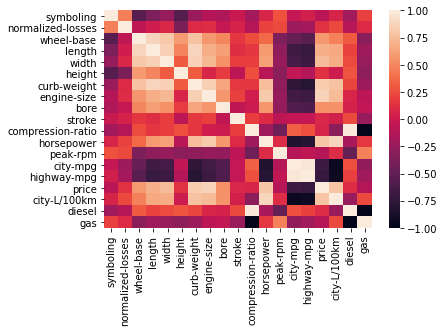

In [29]:
relation=df.corr()
sns.heatmap(relation)
plt.show()

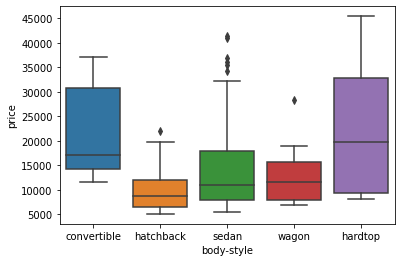

In [30]:
sns.boxplot(x="body-style", y="price", data=df)

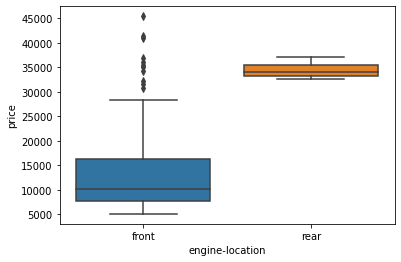

In [31]:
sns.boxplot(x="engine-location", y="price", data=df)

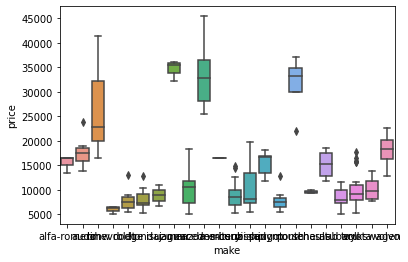

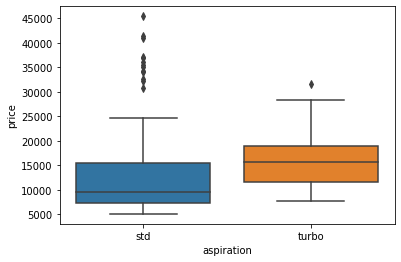

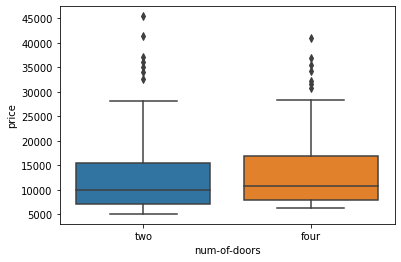

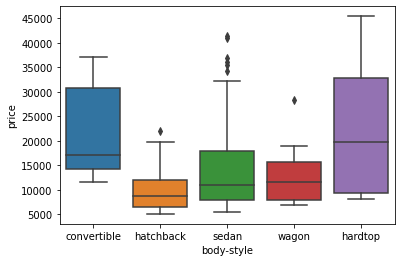

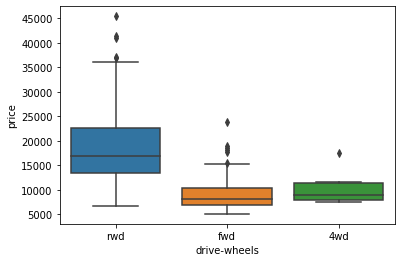

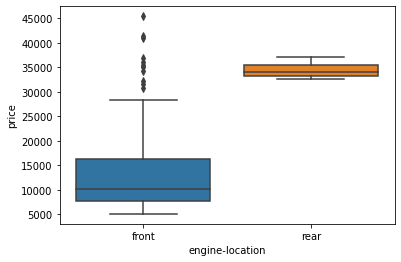

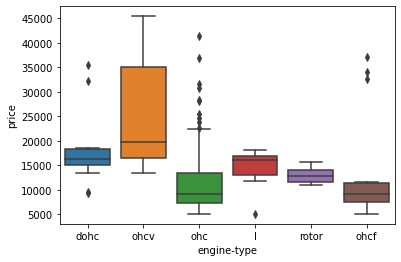

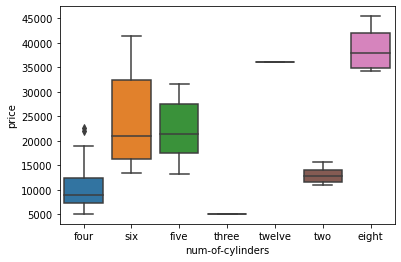

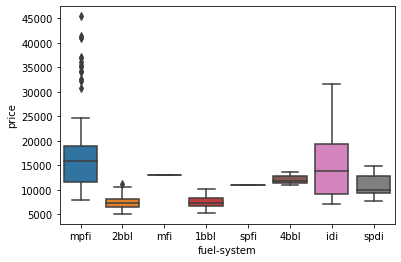

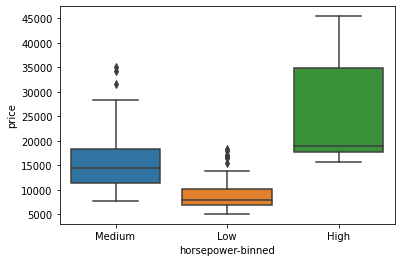

In [32]:

for i in df.describe(include = np.object).columns:
    sns.boxplot(x=df[i], y=df.price)
    plt.show()

In [34]:

df.describe()

df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [35]:

df1= df[['drive-wheels','body-style','price']]
grp1 = df1.groupby(['drive-wheels'],as_index=False).mean()
grp1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [36]:

for i in df.describe(include=np.object).columns:
    print(df.groupby(i)['price'].mean())

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64
aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64
body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          123

In [40]:

df3= df[['drive-wheels','body-style','price']]
grp= df3.groupby(['drive-wheels','body-style'],as_index=False).mean()
grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [39]:
pivot1 = grp.pivot(index='drive-wheels',columns='body-style')
pivot1

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]